In [1]:
import sys
import plotly.graph_objects as go
from datetime import datetime, timedelta, date
import plotly.graph_objects as go
import pandas as pd
sys.path.insert(1, '/Users/georgegarforth/code/trading')
sys.path.insert(1, '/Users/georgegarforth/code/trading/src')

from clients.oanda import get_trades, get_positions, get_transactions, get_transaction_details, get_transactions_since
from utils import get_datetime_from_oanda_datetime_str
from services.visualisation import plot_profits

%load_ext autoreload
%autoreload 2

In [4]:
date_since = datetime(2024,3,27)  # Date after which I started automating trades
transaction_reason = 'MARKET_ORDER_TRADE_CLOSE'

all_transactions = get_transactions_since('0')['transactions']
recent_transactions = [t for t in all_transactions if (
    (get_datetime_from_oanda_datetime_str(t['time']) > date_since)
    & (t['reason'] == transaction_reason if 'reason' in t.keys() else False)
)]

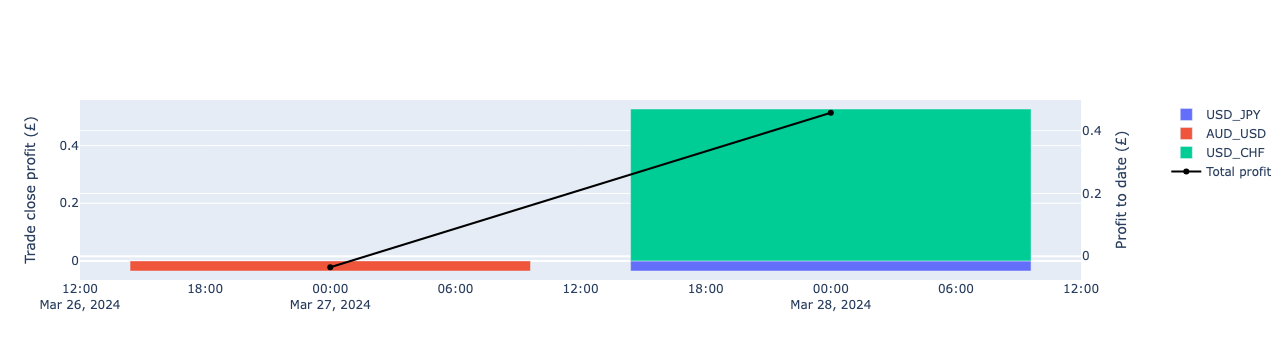

In [5]:
data = [[get_datetime_from_oanda_datetime_str(t['time']).date(), t['instrument'], round(float(t['pl']),3)] for t in recent_transactions]
fig, df = plot_profits(data)
fig